In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.display import SVG, HTML, display
from graphviz import Source
from IPython.display import display

In [3]:
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>"

In [4]:
titanic_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/titanic.csv')

In [5]:
# сколько пропущенных данных в каждой колонке
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Удалим ненужные столбцы
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis = 1)
# Данные, которые необходимо предсказать
Y = titanic_data.Survived

In [7]:
# Переведем все строковые данные в числовые
X = pd.get_dummies(X)
# Зполним пустые значения (в данном случае значеним медианного возраста всех пассажиров)
X = X.fillna({'Age': X.Age.median()})

In [8]:
# Создадим классификатор дерева решения
clf = tree.DecisionTreeClassifier(criterion='entropy')
# Запустим обучение
clf.fit(X, Y)

DecisionTreeClassifier(criterion='entropy')

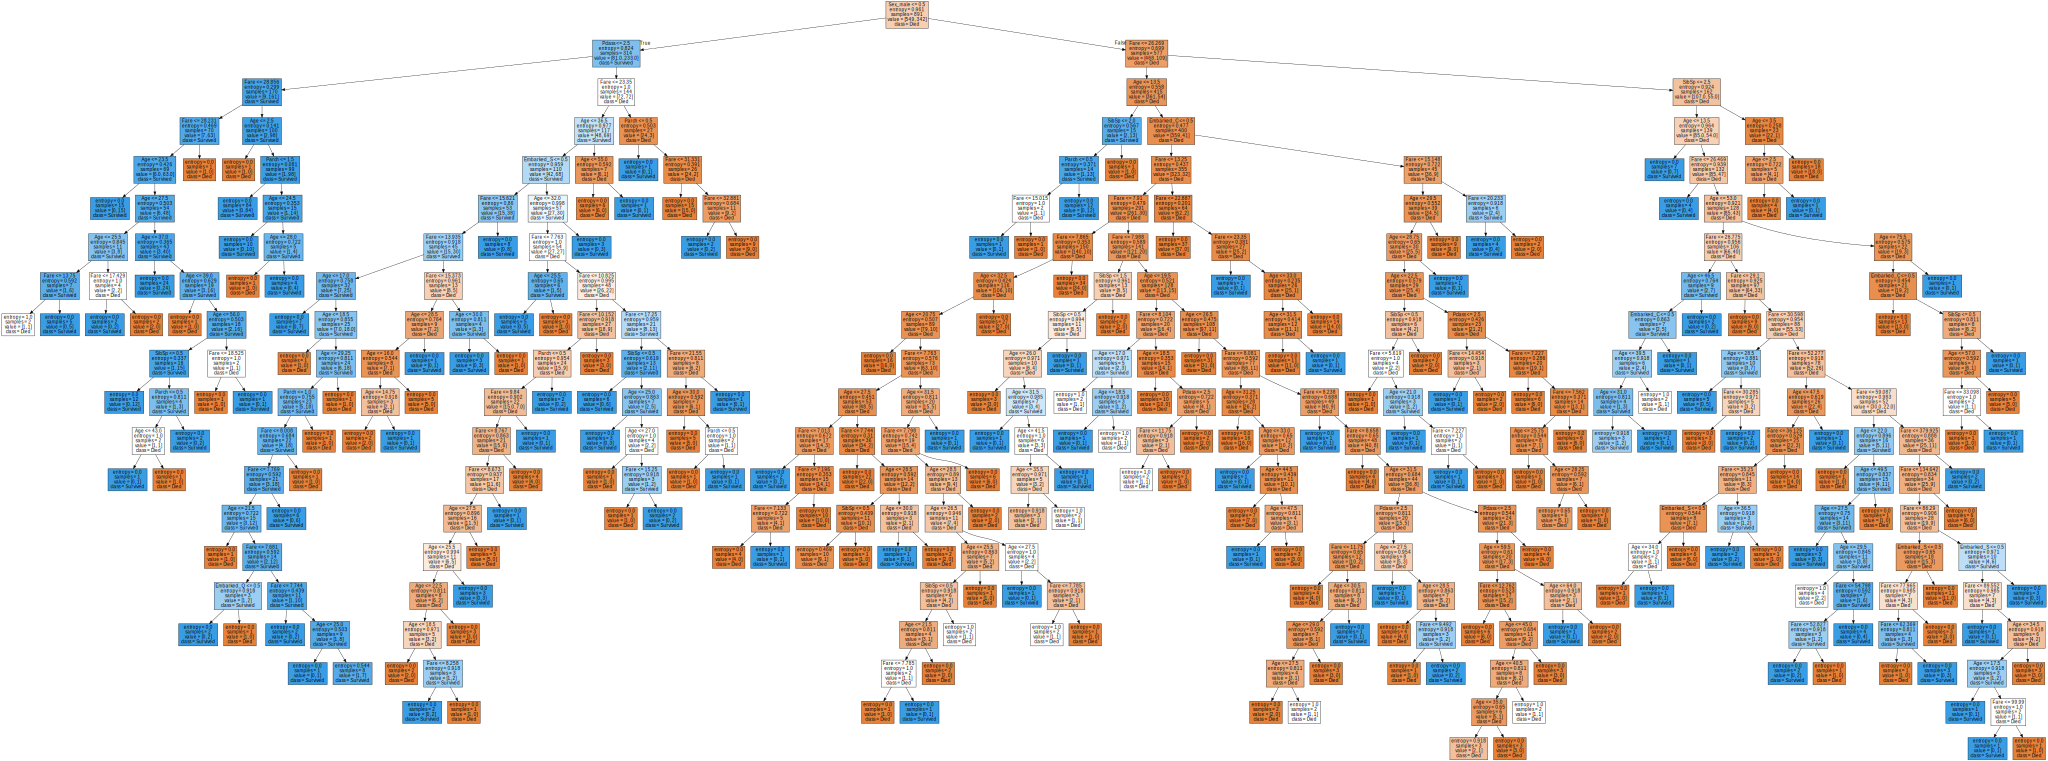

In [9]:
graph = Source(tree.export_graphviz(clf, out_file=None
              ,feature_names=list(X), class_names=['Died', 'Survived']
              ,filled = True))

display(SVG(graph.pipe(format='svg')))

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [12]:
clf.score(X, Y)

0.9797979797979798

In [13]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [14]:
clf.score(X_train, Y_train)

0.9798657718120806

In [15]:
clf.score(X_test, Y_test)

0.7728813559322034

In [16]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [17]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [18]:
clf.score(X_train, Y_train)

0.8406040268456376

In [19]:
clf.score(X_test, Y_test)

0.8067796610169492

In [27]:
max_depth_values = range(1, 100)
scores_data = pd.DataFrame()

In [30]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, Y_train)
    train_score = clf.score(X_train, Y_train)
    test_score = clf.score(X_test, Y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, Y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score' : [train_score],
                                    'test_score' : [test_score],
                                    'cross_val_score' : [mean_cross_val_score]})
    scores_data = pd.concat([scores_data, temp_score_data])

<Axes: xlabel='max_depth', ylabel='score'>

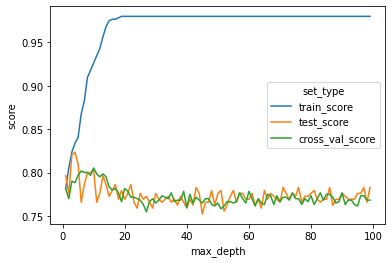

In [32]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'],
                                                var_name='set_type', value_name='score')
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [23]:
from sklearn.model_selection import cross_val_score

In [34]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [35]:
cross_val_score(clf, X_test, Y_test, cv=5).mean()

0.7830508474576271